In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_csv('covid_data.csv')
print(df.shape)
df.head()

(1048575, 21)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [3]:
df.columns = [col.lower() for col in df.columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   usmer                 1048575 non-null  int64 
 1   medical_unit          1048575 non-null  int64 
 2   sex                   1048575 non-null  int64 
 3   patient_type          1048575 non-null  int64 
 4   date_died             1048575 non-null  object
 5   intubed               1048575 non-null  int64 
 6   pneumonia             1048575 non-null  int64 
 7   age                   1048575 non-null  int64 
 8   pregnant              1048575 non-null  int64 
 9   diabetes              1048575 non-null  int64 
 10  copd                  1048575 non-null  int64 
 11  asthma                1048575 non-null  int64 
 12  inmsupr               1048575 non-null  int64 
 13  hipertension          1048575 non-null  int64 
 14  other_disease         1048575 non-null  int64 
 15

# Preprocessing

### Missing Values

In [5]:
# the value 9999-99-99 means that the patient did not died

df.date_died.value_counts()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: date_died, Length: 401, dtype: int64

In [6]:
# creating a function to assign the value 0 or 1 if the patient died or not

def patient_died(date_died):
    if date_died == '9999-99-99':
        return 0
    else:
        return 1

In [7]:
df['died'] = df.date_died.apply(patient_died)

In [8]:
df.drop('date_died', axis=1, inplace=True)

In [9]:
df.died.value_counts()

0    971633
1     76942
Name: died, dtype: int64

- 97, 98 and 99 are missing values

In [10]:
for col in df.columns:
    print(col)
    print(df[col].value_counts(dropna=False))
    print()

usmer
2    662903
1    385672
Name: usmer, dtype: int64

medical_unit
12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: medical_unit, dtype: int64

sex
1    525064
2    523511
Name: sex, dtype: int64

patient_type
1    848544
2    200031
Name: patient_type, dtype: int64

intubed
97    848544
2     159050
1      33656
99      7325
Name: intubed, dtype: int64

pneumonia
2     892534
1     140038
99     16003
Name: pneumonia, dtype: int64

age
30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: age, Length: 121, dtype: int64

pregnant
97    523511
2     513179
1       8131
98      3754
Name: pregnant, dtype: int64

diabetes
2     920248
1     124989
98      3338
Name: diabetes, dtype: int64

copd
2     1030510
1       15062
98       3003
Name: copd, dtype: int64

asthma


In [11]:
for col in df.columns:
    df.loc[(df[col] == 97) | (df[col] == 98) | (df[col] == 99), col] = np.nan

In [12]:
df.isnull().sum()

usmer                        0
medical_unit                 0
sex                          0
patient_type                 0
intubed                 855869
pneumonia                16003
age                        345
pregnant                527265
diabetes                  3338
copd                      3003
asthma                    2979
inmsupr                   3404
hipertension              3104
other_disease             5045
cardiovascular            3076
obesity                   3032
renal_chronic             3006
tobacco                   3220
clasiffication_final         0
icu                     856032
died                         0
dtype: int64

- **in the Boolean features, 1 means "yes" and 2 means "no"**

In [13]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant')

In [14]:
# assigning the columns that are the fewest null values the most constant value

df['diabetes'] = imputer.fit_transform(df.diabetes.values.reshape(-1, 1))
df['copd'] = imputer.fit_transform(df.copd.values.reshape(-1, 1))
df['asthma'] = imputer.fit_transform(df.asthma.values.reshape(-1, 1))
df['inmsupr'] = imputer.fit_transform(df.inmsupr.values.reshape(-1, 1))
df['hipertension'] = imputer.fit_transform(df.hipertension.values.reshape(-1, 1))
df['other_disease'] = imputer.fit_transform(df.other_disease.values.reshape(-1, 1))
df['cardiovascular'] = imputer.fit_transform(df.cardiovascular.values.reshape(-1, 1))
df['obesity'] = imputer.fit_transform(df.obesity.values.reshape(-1, 1))
df['renal_chronic'] = imputer.fit_transform(df.renal_chronic.values.reshape(-1, 1))
df['tobacco'] = imputer.fit_transform(df.tobacco.values.reshape(-1, 1))
df['pneumonia'] = imputer.fit_transform(df.pneumonia.values.reshape(-1, 1))

In [15]:
# and the age values the median

imputeAge = SimpleImputer(missing_values=np.nan, strategy='median')

df['age'] = imputeAge.fit_transform(df.age.values.reshape(-1, 1))

- now, the others columns have more null values, let's examine them 

In [16]:
df.intubed.value_counts(dropna=False)

NaN    855869
2.0    159050
1.0     33656
Name: intubed, dtype: int64

In [17]:
df.loc[df.intubed.isnull(), 'patient_type'].value_counts()

1.0    848544
2.0      7325
Name: patient_type, dtype: int64

- in patient_type the value 1 means that the patient returned at home

In [18]:
# so mostly null values means that the patient returned home

df.loc[df.intubed.isnull(), 'intubed'] = 2

In [19]:
df[df.pregnant.isnull()].head()

,usmer,medical_unit,sex,patient_type,intubed,pneumonia,age,pregnant,diabetes,copd,...,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu,died
1,2.0,1.0,2.0,1.0,2.0,1.0,72.0,NaN,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5.0,NaN,1.0
2,2.0,1.0,2.0,2.0,1.0,2.0,55.0,NaN,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0
4,2.0,1.0,2.0,1.0,2.0,2.0,68.0,NaN,1.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,NaN,1.0
11,2.0,1.0,2.0,2.0,2.0,2.0,24.0,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,0.0
12,2.0,1.0,2.0,2.0,2.0,2.0,30.0,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,0.0


In [20]:
# the null values means that the patient are male

df['pregnant'] = imputer.fit_transform(df.pregnant.values.reshape(-1, 1))

In [21]:
df.icu.value_counts(dropna=False)

NaN    856032
2.0    175685
1.0     16858
Name: icu, dtype: int64

In [22]:
df.loc[df.icu.isnull(), 'patient_type'].value_counts()

1.0    848544
2.0      7488
Name: patient_type, dtype: int64

In [23]:
# just like the 'intubed' column, the patient treated the virus at home


df['icu'] = imputer.fit_transform(df.icu.values.reshape(-1, 1))

In [24]:
df.isnull().sum()

usmer                   0
medical_unit            0
sex                     0
patient_type            0
intubed                 0
pneumonia               0
age                     0
pregnant                0
diabetes                0
copd                    0
asthma                  0
inmsupr                 0
hipertension            0
other_disease           0
cardiovascular          0
obesity                 0
renal_chronic           0
tobacco                 0
clasiffication_final    0
icu                     0
died                    0
dtype: int64

### Outliers

In [25]:
pd.options.display.float_format = '{:.2f}'.format

df.describe()

,usmer,medical_unit,sex,patient_type,intubed,pneumonia,age,pregnant,diabetes,copd,...,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu,died
count,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,...,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00
mean,1.63,8.98,1.50,1.19,1.97,1.84,41.78,0.99,1.87,1.98,...,1.98,1.84,1.96,1.97,1.84,1.98,1.91,5.31,0.35,0.07
std,0.48,3.72,0.50,0.39,0.18,0.41,16.88,1.00,0.34,0.16,...,0.16,0.38,0.21,0.18,0.37,0.17,0.29,1.88,0.75,0.26
min,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
25%,1.00,4.00,1.00,1.00,2.00,2.00,30.00,0.00,2.00,2.00,...,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,0.00,0.00
50%,2.00,12.00,1.00,1.00,2.00,2.00,40.00,0.00,2.00,2.00,...,2.00,2.00,2.00,2.00,2.00,2.00,2.00,6.00,0.00,0.00
75%,2.00,12.00,2.00,1.00,2.00,2.00,53.00,2.00,2.00,2.00,...,2.00,2.00,2.00,2.00,2.00,2.00,2.00,7.00,0.00,0.00
max,2.00,13.00,2.00,2.00,2.00,2.00,121.00,2.00,2.00,2.00,...,2.00,2.00,2.00,2.00,2.00,2.00,2.00,7.00,2.00,1.00


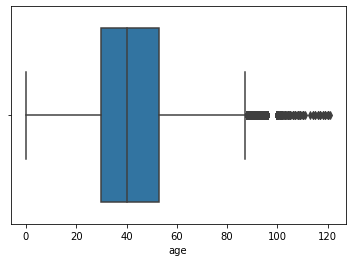

In [26]:
sns.boxplot(data=df, x='age');

In [27]:
# changing the values of 'age' column

df.loc[(df.age > 0) & (df.age <= 10), 'age'] = 0
df.loc[(df.age > 10) & (df.age <= 20), 'age'] = 1
df.loc[(df.age > 20) & (df.age <= 30), 'age'] = 2
df.loc[(df.age > 30) & (df.age <= 50), 'age'] = 3
df.loc[(df.age > 50) & (df.age <= 60), 'age'] = 4
df.loc[(df.age > 60) & (df.age <= 80), 'age'] = 5
df.loc[(df.age > 80) & (df.age <= 90), 'age'] = 6
df.loc[df.age > 90, 'age'] = 7

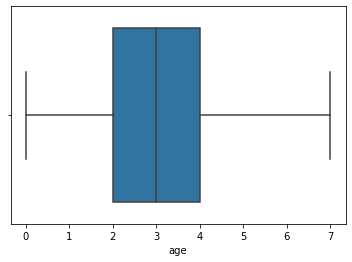

In [28]:
sns.boxplot(data=df, x='age');

# Correlation

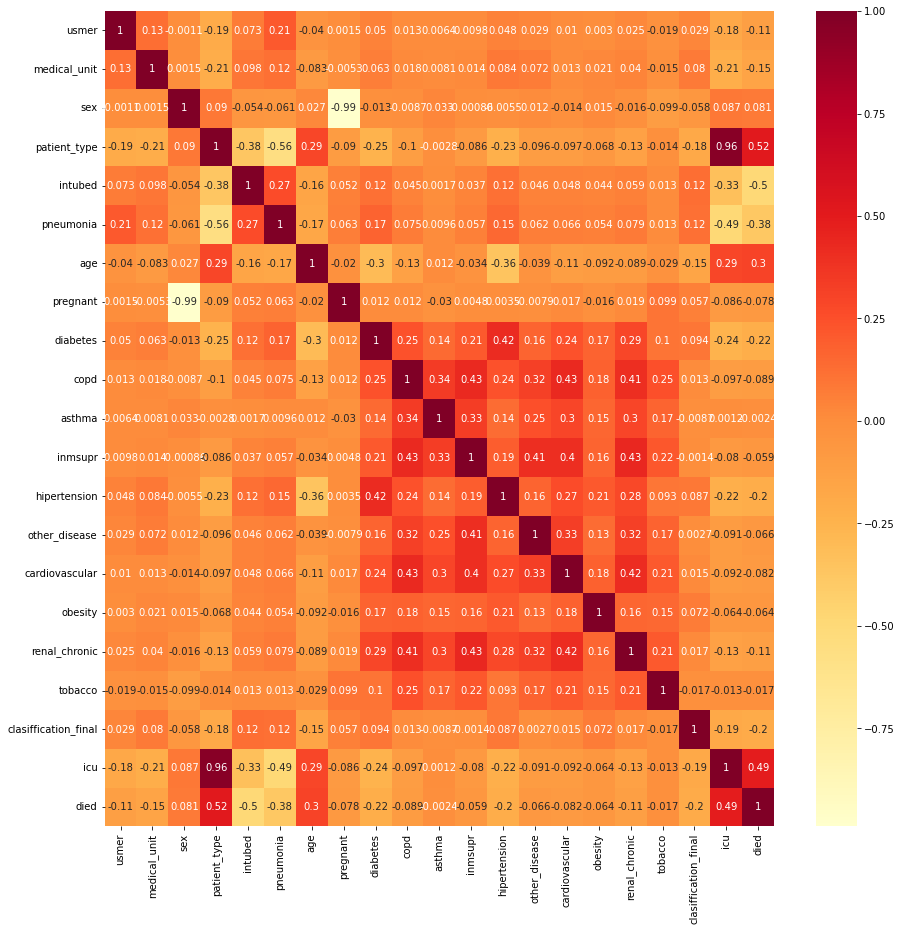

In [29]:
fig, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')

plt.show()

# Unbalanced Targets??

In [30]:
perc_died = df.groupby(['died'])['died'].count()

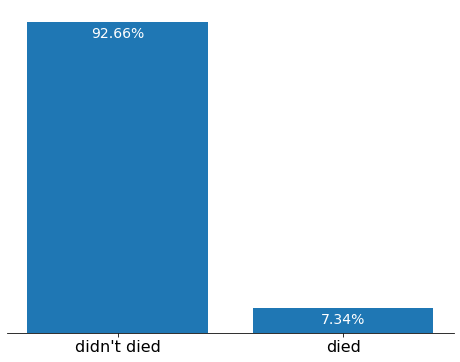

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(x=perc_died.index, height=perc_died.values)

ax.annotate(
    text='{:,.2f}%'.format(perc_died.values[0] / (perc_died.values[1] + perc_died.values[0]) * 100),
    xy=(0, perc_died.values[0]),
    ha='center',
    xytext=(0, -15),
    textcoords="offset points",
    fontsize=14,
    color='white'
)

ax.annotate(
    text='{:,.2f}%'.format(perc_died.values[1] / (perc_died.values[1] + perc_died.values[0]) * 100),
    xy=(1, perc_died.values[1]),
    ha='center',
    xytext=(0, -15),
    textcoords="offset points",
    fontsize=14,
    color='white'
)

ax.spines[['top', 'left', 'right']].set_visible(False)
ax.yaxis.set_visible(False)

ax.set_xticks([0, 1], ['didn\'t died', 'died'], fontsize=16)

plt.show()

- we can see that our dataset is unbalanced, to train our data, we need to balance them

In [32]:
X = df.drop('died', axis=1)
y = df.died

In [33]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=0, stratify=y)
X_train, y_train = X_train_full[:-100000], y_train_full[:-100000]
X_valid, y_valid = X_train_full[-100000:], y_train_full[-100000:]

In [34]:
X_train_full.shape, X_train.shape, X_valid.shape, X_test.shape

((786431, 20), (686431, 20), (100000, 20), (262144, 20))

In [35]:
y_train.value_counts()

0.00    636105
1.00     50326
Name: died, dtype: int64

In [36]:
# using RandomOverSampler to balance the data

rs = RandomOverSampler(random_state=0)

X_res, y_res = rs.fit_resample(X_train, y_train)

y_res.value_counts()

0.00    636105
1.00    636105
Name: died, dtype: int64

# Deep Learning

- using the architecture *Wide & Deep*

In [37]:
# defining which features will follow on the Wide path and which on the Deep path

wide = ['patient_type', 'intubed', 'age', 'icu']
deep = [feature for feature in X.columns if feature not in wide]

In [38]:
len(wide), len(deep)

(4, 16)

In [39]:
tf.random.set_seed(0)

In [40]:
# input layers
input_wide = tf.keras.layers.Input(shape=[len(wide)])
input_deep = tf.keras.layers.Input(shape=[len(deep)])

# normalization layers
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

# hidden layers
hidden1 = tf.keras.layers.Dense(50, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(50, activation='relu')(hidden1)
hidden3 = tf.keras.layers.Dense(50, activation='relu')(hidden2)

# concatenate layer
concat = tf.keras.layers.concatenate([norm_wide, hidden3])

# output layer
output = tf.keras.layers.Dense(1, activation='sigmoid')(concat)

In [41]:
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [42]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

In [43]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall()])

In [44]:
X_train_wide, X_train_deep = X_res[wide], X_res[deep]
X_valid_wide, X_valid_deep = X_valid[wide], X_valid[deep]
X_test_wide, X_test_deep = X_test[wide], X_test[deep]

In [45]:
X_train_deep.shape, X_train_wide.shape

((1272210, 16), (1272210, 4))

In [46]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

In [47]:
history = model.fit((X_train_wide, X_train_deep), y_res, epochs=20,
                   validation_data=((X_valid_wide, X_valid_deep), y_valid))

Epoch 1/20
39757/39757 [==============================] - 205s 5ms/step - loss: 0.2468 - accuracy: 0.9052 - recall: 0.9183 - val_loss: 0.2491 - val_accuracy: 0.8992 - val_recall: 0.9129
Epoch 2/20
39757/39757 [==============================] - 194s 5ms/step - loss: 0.2376 - accuracy: 0.9091 - recall: 0.9226 - val_loss: 0.2599 - val_accuracy: 0.8982 - val_recall: 0.9222
Epoch 3/20
39757/39757 [==============================] - 181s 5ms/step - loss: 0.2354 - accuracy: 0.9103 - recall: 0.9241 - val_loss: 0.2702 - val_accuracy: 0.8964 - val_recall: 0.9271
Epoch 4/20
39757/39757 [==============================] - 188s 5ms/step - loss: 0.2343 - accuracy: 0.9109 - recall: 0.9248 - val_loss: 0.2448 - val_accuracy: 0.9010 - val_recall: 0.9148
Epoch 5/20
39757/39757 [==============================] - 209s 5ms/step - loss: 0.2334 - accuracy: 0.9114 - recall: 0.9254 - val_loss: 0.2505 - val_accuracy: 0.9005 - val_recall: 0.9154
Epoch 6/20
39757/39757 [==============================] - 239s 6ms/ste

In [48]:
model.evaluate((X_test_wide, X_test_deep), y_test)

8192/8192 [==============================] - 27s 3ms/step - loss: 0.2577 - accuracy: 0.9003 - recall: 0.9194


[0.2577103078365326, 0.9002723693847656, 0.919421911239624]

- our model had **90% of accuracy**, **91.9% of recall** and had **0.25 loss** on the test data
- very similar to the test and validation data
- so we can say that there was no overfitting